In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib as plt
import seaborn as sn

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\eserheads\anaconda3\envs\environment1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_PH = df[df['job_country'] == 'Philippines']

df_skills = df_PH.explode('job_skills')

df_skills

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
76,Data Analyst,Data Analyst - 14785091749,Anywhere,via Jobgether,Full-time,True,Philippines,2023-08-26 13:13:26,False,False,Philippines,None,NaN,NaN,Support Shepherd,sql,"{'analyst_tools': ['excel', 'tableau', 'power ..."
76,Data Analyst,Data Analyst - 14785091749,Anywhere,via Jobgether,Full-time,True,Philippines,2023-08-26 13:13:26,False,False,Philippines,None,NaN,NaN,Support Shepherd,python,"{'analyst_tools': ['excel', 'tableau', 'power ..."
76,Data Analyst,Data Analyst - 14785091749,Anywhere,via Jobgether,Full-time,True,Philippines,2023-08-26 13:13:26,False,False,Philippines,None,NaN,NaN,Support Shepherd,r,"{'analyst_tools': ['excel', 'tableau', 'power ..."
76,Data Analyst,Data Analyst - 14785091749,Anywhere,via Jobgether,Full-time,True,Philippines,2023-08-26 13:13:26,False,False,Philippines,None,NaN,NaN,Support Shepherd,excel,"{'analyst_tools': ['excel', 'tableau', 'power ..."
76,Data Analyst,Data Analyst - 14785091749,Anywhere,via Jobgether,Full-time,True,Philippines,2023-08-26 13:13:26,False,False,Philippines,None,NaN,NaN,Support Shepherd,tableau,"{'analyst_tools': ['excel', 'tableau', 'power ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785690,Data Scientist,Customer Master Data Specialist,"Makati, Metro Manila, Philippines",via Trabajo.org,Full-time,False,Philippines,2023-01-18 06:16:42,False,False,Philippines,None,NaN,NaN,Henkel,vba,"{'analyst_tools': ['sap', 'word', 'powerpoint'..."
785690,Data Scientist,Customer Master Data Specialist,"Makati, Metro Manila, Philippines",via Trabajo.org,Full-time,False,Philippines,2023-01-18 06:16:42,False,False,Philippines,None,NaN,NaN,Henkel,sap,"{'analyst_tools': ['sap', 'word', 'powerpoint'..."
785690,Data Scientist,Customer Master Data Specialist,"Makati, Metro Manila, Philippines",via Trabajo.org,Full-time,False,Philippines,2023-01-18 06:16:42,False,False,Philippines,None,NaN,NaN,Henkel,word,"{'analyst_tools': ['sap', 'word', 'powerpoint'..."
785690,Data Scientist,Customer Master Data Specialist,"Makati, Metro Manila, Philippines",via Trabajo.org,Full-time,False,Philippines,2023-01-18 06:16:42,False,False,Philippines,None,NaN,NaN,Henkel,powerpoint,"{'analyst_tools': ['sap', 'word', 'powerpoint'..."


In [3]:
df_skills_count = df_skills.groupby(['job_skills','job_title_short']).size()

df_skills_count = df_skills_count.reset_index(name='skill_count')

df_skills_count = df_skills_count.sort_values(by='skill_count',ascending=False)

df_skills_count

,job_skills,job_title_short,skill_count
276,excel,Data Analyst,2242
1002,sql,Data Analyst,1781
1003,sql,Data Engineer,1303
777,python,Data Engineer,1097
776,python,Data Analyst,980
...,...,...,...
1183,watson,Data Engineer,1
1185,watson,Machine Learning Engineer,1
1187,webex,Cloud Engineer,1
1188,webex,Data Analyst,1


In [4]:
job_titles = df_skills_count['job_title_short'].unique().tolist()[:3]

job_titles

['Data Analyst', 'Data Engineer', 'Business Analyst']

In [5]:
import matplotlib.pyplot as plt

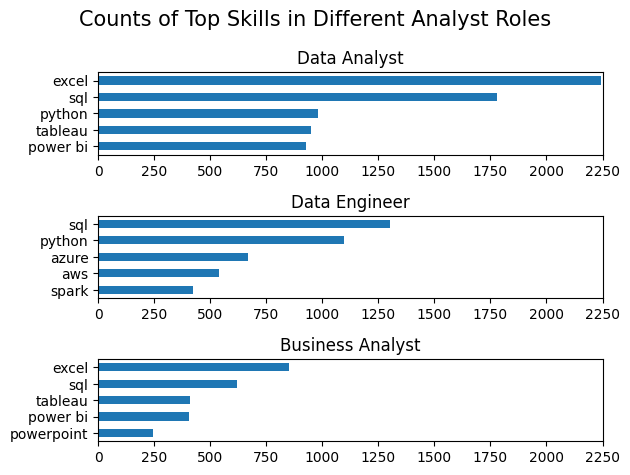

In [6]:
top_no = 5

fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate (job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_no)
    df_plot.plot(kind='barh', x='job_skills',y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel("")
    ax[i].set_xlim(0,2250)
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Different Analyst Roles',fontsize=15)
plt.tight_layout()

In [7]:
df_PH_job_count = df_PH['job_title_short'].value_counts().reset_index(name='job_count')

df_PH_job_count

,job_title_short,job_count
0,Data Analyst,4766
1,Data Engineer,2051
2,Business Analyst,1725
3,Data Scientist,1347
4,Software Engineer,546
5,Senior Data Analyst,542
6,Senior Data Engineer,299
7,Cloud Engineer,200
8,Senior Data Scientist,186
9,Machine Learning Engineer,124


In [8]:
df_skills_count_new = pd.merge(df_skills_count,df_PH_job_count,how='left',on='job_title_short')

df_skills_count_new

,job_skills,job_title_short,skill_count,job_count
0,excel,Data Analyst,2242,4766
1,sql,Data Analyst,1781,4766
2,sql,Data Engineer,1303,2051
3,python,Data Engineer,1097,2051
4,python,Data Analyst,980,4766
...,...,...,...,...
1223,watson,Data Engineer,1,2051
1224,watson,Machine Learning Engineer,1,124
1225,webex,Cloud Engineer,1,200
1226,webex,Data Analyst,1,4766


In [9]:
def to_percent(x, _):
    return f'{x:.0f}%'

In [10]:
df_skills_count_new['%'] = df_skills_count_new['skill_count']/df_skills_count_new['job_count']

df_skills_count_new['%'] = df_skills_count_new['%']*100

df_skills_count_new

,job_skills,job_title_short,skill_count,job_count,%
0,excel,Data Analyst,2242,4766,47.041544
1,sql,Data Analyst,1781,4766,37.368863
2,sql,Data Engineer,1303,2051,63.529985
3,python,Data Engineer,1097,2051,53.486104
4,python,Data Analyst,980,4766,20.562316
...,...,...,...,...,...
1223,watson,Data Engineer,1,2051,0.048757
1224,watson,Machine Learning Engineer,1,124,0.806452
1225,webex,Cloud Engineer,1,200,0.500000
1226,webex,Data Analyst,1,4766,0.020982


In [11]:
from matplotlib.ticker import FuncFormatter

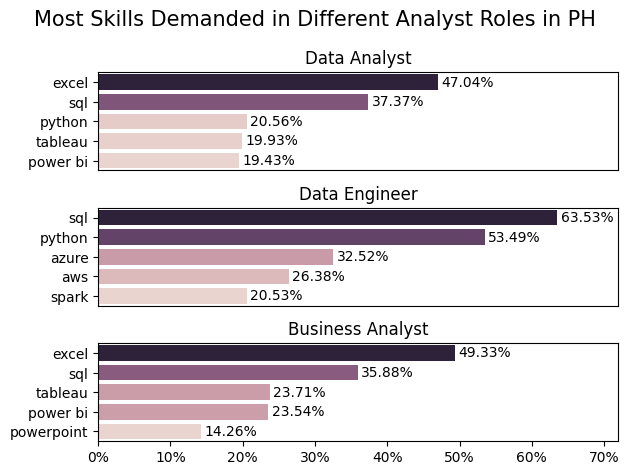

In [13]:
top_no = 5

fig, ax = plt.subplots(len(job_titles), 1)

def to_percent(x, _):
    return f'{x:.0f}%'

for i, job_title in enumerate (job_titles):
    df_plot = df_skills_count_new[df_skills_count_new['job_title_short'] == job_title].head(top_no)
    #df_plot.plot(kind='barh', x='job_skills',y='%', ax=ax[i], title=job_title)
    sn.barplot(data=df_plot,x='%',y='job_skills',ax=ax[i],hue='skill_count')
    #ax[i].invert_yaxis()
    ax[i].set_title(job_title)
    ax[i].set_xlabel("")
    ax[i].set_ylabel("")
    ax[i].set_xlim(0,72)
    ax[i].xaxis.set_major_formatter(FuncFormatter(to_percent))
    ax[i].legend().set_visible(False)

    if i !=  len(job_titles)-1:
        ax[i].set_xticks([])


    for n, v in enumerate(df_plot['%']):
        ax[i].text(v+0.5, n, f'{v:.2f}%', va='center')

fig.suptitle('Most Skills Demanded in Different Analyst Roles in PH',fontsize=15)
plt.tight_layout()
plt.show()